In [3]:
import numpy as np
import os
import datetime
import pandas as pd
# from tqdm import tqdm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn import preprocessing
from sklearn import datasets

### Generate DataSets

In [11]:
# generate features matrix, target vector, and the true coefficients
features, target, coefficients = datasets.make_regression(n_samples=400, n_features=6, n_informative=6, n_targets=1,
                                                         noise=0.0, coef=True,random_state=3)
features = pd.DataFrame(features, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'f6'])
features['target'] = target
features.head(3)

,f1,f2,f3,f4,f5,f6,target
0,-0.477218,-0.043818,-1.313865,0.884622,-0.082741,-0.627001,-151.384791
1,0.708729,0.378728,-0.340076,-0.057615,-1.010014,0.755237,44.779894
2,-0.137441,-0.342813,-0.440835,1.103920,-0.267193,2.050345,191.615494


In [10]:
# generate features matrix, target vector
cl_features, cl_target = datasets.make_classification(n_samples=400, n_features=6, n_informative=6, n_redundant=0,
                                                      n_classes=3, weights=[0.25, 0.35, 0.4], random_state=3)
cl_features = pd.DataFrame(cl_features, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'f6'])
cl_features['Target'] = cl_target
cl_features.head(3)

,f1,f2,f3,f4,f5,f6,Target
0,0.913812,1.710292,1.296374,-1.371327,-0.053150,0.187272,2
1,-0.409279,2.442136,0.883636,-1.304998,-0.980046,0.633240,0
2,-2.588178,-1.902312,-3.774491,-1.611354,1.793390,1.440196,1


In [30]:
# generate feature matrix and target vector for clustering
bl_features, bl_target = datasets.make_blobs(n_samples=400, n_features=2, centers=5, cluster_std=0.5, shuffle=True,
                                            random_state=1)
bl_features = pd.DataFrame(bl_features, columns=['f1', 'f2'])
bl_features['Target'] = bl_target
bl_features.head(3)

,f1,f2,Target
0,-5.848155,-3.158641,3
1,-10.246819,-4.108841,1
2,-6.189861,-3.670789,3


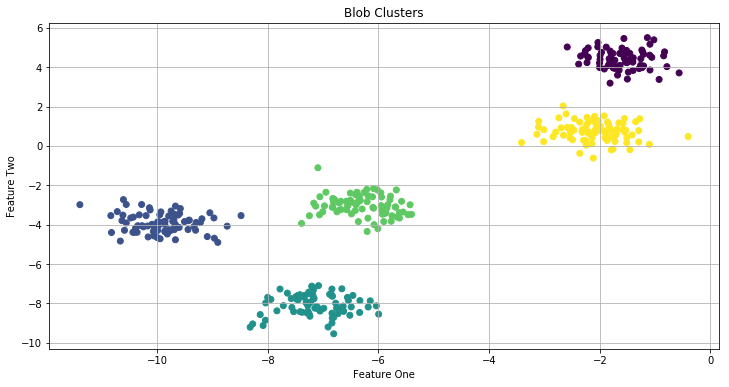

In [31]:
plt.figure(figsize=(12, 6))
plt.title("Blob Clusters")
plt.scatter(bl_features['f1'], bl_features['f2'], c=bl_target)
plt.ylabel("Feature Two")
plt.xlabel("Feature One")
plt.grid()
plt.show()

### Numerical Data
Scaling: PCA usually Standardization, NN ususally MinMax

In [40]:
# Rescale Data
# x' = (x - min) / (max - min)
n_feature = features.copy()
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
n_feature['f1_scale'] = minmax_scale.fit_transform(np.array(n_feature.f1).reshape(-1, 1))
n_feature.head(3)

,f1,f2,f3,f4,f5,f6,target,f1_scale
0,-0.477218,-0.043818,-1.313865,0.884622,-0.082741,-0.627001,-151.384791,0.431844
1,0.708729,0.378728,-0.340076,-0.057615,-1.010014,0.755237,44.779894,0.673084
2,-0.137441,-0.342813,-0.440835,1.103920,-0.267193,2.050345,191.615494,0.500960


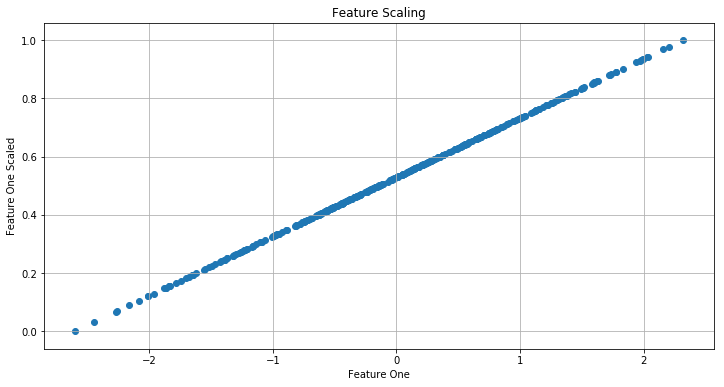

In [44]:
plt.figure(figsize=(12, 6))
plt.title("Feature Scaling")
plt.scatter(n_feature['f1'], n_feature['f1_scale'])
plt.ylabel("Feature One Scaled")
plt.xlabel("Feature One")
plt.grid()
plt.show()

In [45]:
# Standardize a feature (mean of 0, std of 1)
# x' = (x - Mean) / std
scaler = preprocessing.StandardScaler()
n_feature['f1_standard'] = scaler.fit_transform(np.array(n_feature.f1).reshape(-1, 1))
n_feature.head(3)

,f1,f2,f3,f4,f5,f6,target,f1_scale,f1_standard
0,-0.477218,-0.043818,-1.313865,0.884622,-0.082741,-0.627001,-151.384791,0.431844,-0.505706
1,0.708729,0.378728,-0.340076,-0.057615,-1.010014,0.755237,44.779894,0.673084,0.737816
2,-0.137441,-0.342813,-0.440835,1.103920,-0.267193,2.050345,191.615494,0.500960,-0.149433


In [48]:
# Robust Scaler uses inter-quartile range to avoid outliers
# Standardize a feature (mean of 0, std of 1) 
# x' = (x - Mean) / std
r_scaler = preprocessing.RobustScaler()
n_feature['f1_robustSt'] = r_scaler.fit_transform(np.array(n_feature.f1).reshape(-1, 1))
n_feature.head(3)

,f1,f2,f3,f4,f5,f6,target,f1_scale,f1_standard,f1_robustSt
0,-0.477218,-0.043818,-1.313865,0.884622,-0.082741,-0.627001,-151.384791,0.431844,-0.505706,-0.386434
1,0.708729,0.378728,-0.340076,-0.057615,-1.010014,0.755237,44.779894,0.673084,0.737816,0.568626
2,-0.137441,-0.342813,-0.440835,1.103920,-0.267193,2.050345,191.615494,0.500960,-0.149433,-0.112807


Normalizing: Observation magnitude of one or sum of one

In [59]:
# Transform l2 -> length of 1 Euclidean normm
# x' = x / (Current Length: sqrt of squared features)
features_l2_norm = preprocessing.Normalizer(norm="l2").transform(features.iloc[:, :6].values)
features_l2_norm[:3]

array([[-0.26937705, -0.02473421, -0.74164216,  0.49934611, -0.04670539,
        -0.35392542],
       [ 0.46181195,  0.24678144, -0.22159514, -0.03754253, -0.65813082,
         0.49211646],
       [-0.05694798, -0.14204309, -0.18265847,  0.45740518, -0.11071052,
         0.84955297]])

In [61]:
# Manhattan (L1) Norm taxi cab
# x' = x / (sum of features)
features_l1_norm = preprocessing.Normalizer(norm="l1").transform(features.iloc[:, :6].values)
features_l1_norm[:3]

array([[-0.13916042, -0.01277771, -0.38313299,  0.25796264, -0.02412805,
        -0.18283818],
       [ 0.21804376,  0.11651745, -0.10462578, -0.01772565, -0.31073539,
         0.23235198],
       [-0.03164976, -0.07894273, -0.10151538,  0.25421028, -0.06152915,
         0.47215271]])

Generating Polynomial and Interacting Features

In [62]:
test = np.array([[2, 3], [3, 4]])
polynomial_interaction = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
polynomial_interaction.fit_transform(test)

array([[ 2.,  3.,  4.,  6.,  9.],
       [ 3.,  4.,  9., 12., 16.]])

Create Functions

In [63]:
def add_ten(x):
    return x+10
my_transformer = preprocessing.FunctionTransformer(add_ten)
my_transformer.transform(test)

C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


array([[12, 13],
       [13, 14]])

In [65]:
pd.DataFrame(test).apply(add_ten)

,0,1
0,12,13
1,13,14


Outliers
- Elliptic Envelope: sklearn.covariance.EllipticEnvelope: (contamination parameter % outliers)
- Use Interquartile range: outliers 1.5 IQR less than first quartile or 1.5 IQR more than third quartile

Handle Outliers:
- Drop them
- Mark them as a feature
- transform the feature to dampen the effect of the outlier (ex: take log)

Discrete and Bins
- preprocessing.Binarizer : threshold and 1 if greater else 0
- np.digitize : bins=[20, 30, 64]; left edge unles right=True
- Use sklearn.cluster.Kmeans to identify clusters and have the cluster as a feature if you know how many features

Missing Values:
- Deleting: array[~np.isnan(array).any(axis=1]
- Deleting: df.dropna()
- Imput Value using K-nearest neighbors using fancyimput.KNN
- Imput Value: sklearn.preprocessing.Imputer and define strategy: mean, mode, median

### Categorical Data
- One Hot encoding for Non-ordered and drop one of the features to avoid linear dependence

In [73]:
# Encoding non ordered data
cat_test = np.array([['Texas', 'Large'], ['Delaware', 'Small'], ['Ohio', 'Medium'], ['Iowa', 'Medium']])
one_hot = preprocessing.LabelBinarizer()
one_hot.fit_transform(cat_test[:,0])
print(one_hot.classes_, one_hot.fit_transform(cat_test[:,0]))

['Delaware' 'Iowa' 'Ohio' 'Texas'] [[0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]]


In [74]:
pd.get_dummies(cat_test[:, 0])

,Delaware,Iowa,Ohio,Texas
0,0,0,0,1
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0


In [76]:
# Each Observation lists muliple Classes
mc_test = [('Texas', 'Florida'), ('California', 'Alabama'), ('Texas', 'Iowa'), ('Florida', 'Alabama')]
one_hot_mc = preprocessing.MultiLabelBinarizer()
one_hot_mc.fit_transform(mc_test), one_hot_mc.classes_

(array([[0, 0, 1, 0, 1],
        [1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1],
        [1, 0, 1, 0, 0]]),
 array(['Alabama', 'California', 'Florida', 'Iowa', 'Texas'], dtype=object))

In [90]:
cat_df = pd.DataFrame(cat_test, columns=['state', 'size'])
cat_df.head(3)
cat_df = pd.get_dummies(cat_df, columns=['state'], drop_first=True)
scale_map = {'Small': 1, 'Medium': 2, 'Large': 3}
cat_df['sizeN'] = cat_df['size'].replace(scale_map)
cat_df

,size,state_Iowa,state_Ohio,state_Texas,sizeN
0,Large,0,0,1,3
1,Small,0,0,0,1
2,Medium,0,1,0,2
3,Medium,1,0,0,2


DictVectorizer: word count dictionary for documents as use case
- sklearn.feature_extraction.DictVectorizer: can define as sparse or not, fit_transform

Missing Values
- Train a KNN on known and then predict for unknown
- Fill with Most common

Unbalanced Classes:
- Collect more data
- Use a good model evaluation metric (Not accuracy - precision, recall, f1, etc)
- Specify class weights in training algorithm
- Downsample: np.random.choice
- Upsample: np.random.choiice with replace=True

np.random.choice(indexClass1, SizeClass2, replace) and then vstack the features and targets of chosen